In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('room_temperature_info.csv')
# df.head()

In [3]:
# df.info()

In [4]:
room_ids = df['room_id'].unique()

In [5]:
def convert_to_time(date):
    return str(datetime.strptime(date, "%Y-%m-%d %H:%M:%S.%f").replace(microsecond=0).time())

In [6]:
def show_plot(room_id, is_radiator_on, temp_list, timestamp):
    plt.figure(figsize=(20,10))
    plt.title(f'RoomId: {room_id}   -   RadiatorOn: {is_radiator_on}')
    plt.plot(timestamp, temp_list)
    plt.xticks(rotation=-45)
    plt.show()

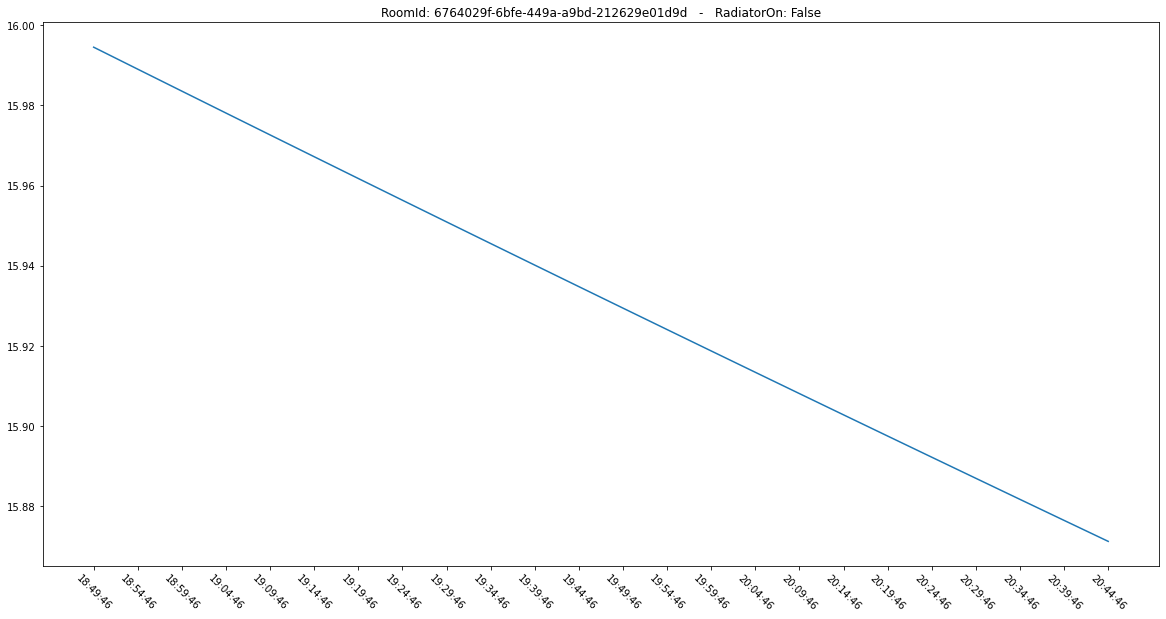

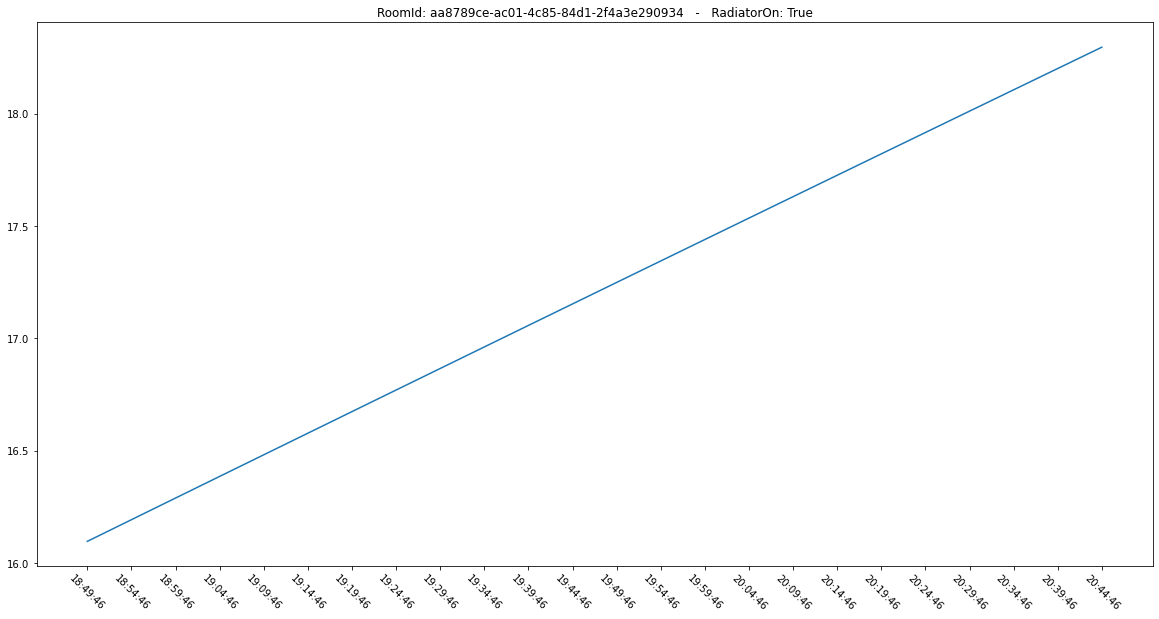

In [7]:
for room_id in room_ids:
    is_radiator_on = df['is_radiator_on'].where(df['room_id'] == room_id).dropna().unique()[0]
    timestamp = df['creation_date'].where(df['room_id'] == room_id).dropna().to_numpy()
    temp_list = df['temperature_in_celsius'].where(df['room_id'] == room_id).dropna().to_numpy()
    timestamp = list(map(convert_to_time, timestamp))
    show_plot(room_id, is_radiator_on, temp_list, timestamp)